<a href="https://colab.research.google.com/github/loclocsimon/SQL/blob/main/Simon_Ngo_Online_Retail_SQL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Simon Ngo || Online Retail II UCI - (Kaggle) Data Set || Queries done on SQLITE**

## This notebook will go over Basic Exploration of the Dataset || Business Analyst Perspective Insights || Actionable Recommendations & Metrics
---





This Data Set has these columns :
---


*   InvoiceNo	-- Transaction identifier
*   StockCode	-- Product identifier
*   Description	  --                          Product name
*   Quantity	   --                           Units sold (per transaction)
*   InvoiceDate   --                         	Date & time of transaction
*   UnitPrice    --                         	Price per unit in £
*   CustomerID    --                        	Customer identifier
*   Country	    --                            Customer’s country


---















## **Basic Exploration :**

How many Unique Customers are there and how many purchases have the top 10 buyers have in total ?


In [ ]:
%%sql
SELECT COUNT(DISTINCT("Customer ID")) AS UNIQUE_CUSTOMERS
FROM main.online_retaiL;

Output : 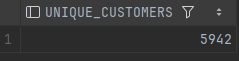

In [ ]:
%%sql

SELECT "Customer ID",
        COUNT("Quantity") AS TOTAL_PRODUCTS_BOUGHT
FROM main.online_retaiL
WHERE "Customer ID" IS NOT NULL
GROUP BY "Customer ID"
ORDER BY TOTAL_PRODUCTS_BOUGHT DESC
LIMIT 10;

Output: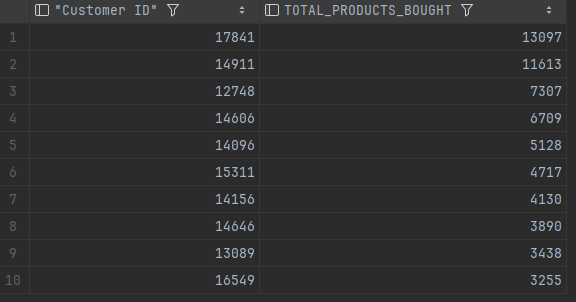

From the top 10 Buyers, list the ones that generated the most amount of revenue, and where are they from ? also what is their total combined revenue sales ?


In [ ]:
%%sql
SELECT "Customer ID",
        COUNT("Quantity") AS TOTAL_PRODUCTS_BOUGHT,
        ROUND(SUM(Quantity * price),2) AS TOTAL_REVENUE,
        Country
FROM main.online_retaiL
WHERE "Customer ID" IS NOT NULL
GROUP BY "Customer ID"
ORDER BY TOTAL_REVENUE DESC
LIMIT 10;

UsageError: Cell magic `%%sql` not found.


Output: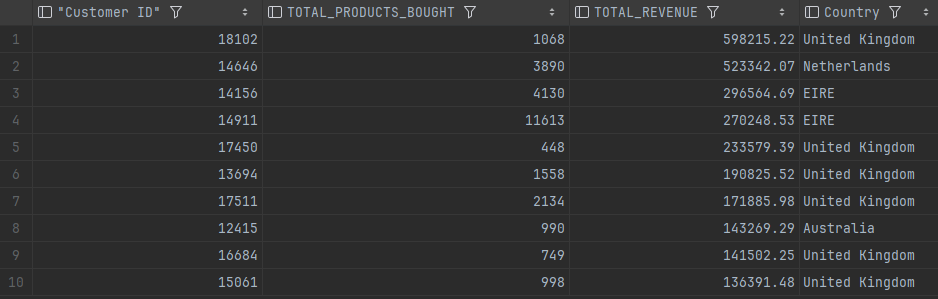

In [ ]:
%%sql

WITH TOP_10_EARNINGS AS
    (SELECT "Customer ID",
        COUNT("Quantity") AS TOTAL_PRODUCTS_BOUGHT,
        ROUND(SUM(Quantity * price),2) AS TOTAL_REVENUE,
        Country
FROM main.online_retaiL
WHERE "Customer ID" IS NOT NULL
GROUP BY "Customer ID"
ORDER BY TOTAL_REVENUE DESC
LIMIT 10
)

SELECT
      SUM(TOTAL_REVENUE)
FROM TOP_10_EARNINGS;

Output: 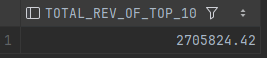

What is the total revenue and which year was the best performing year?

In [ ]:
%%sql
-- Total Revenue Earned
SELECT SUM(Price * Quantity) AS TOTAL_REVENUE
FROM main.online_retaiL;

Output: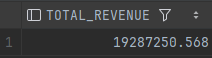

In [ ]:
%%sql

-- Find out the best performing year, Display in order of Top Year
SELECT
    DISTINCT(STRFTIME('%Y', InvoiceDate)) AS YEAR,
    ROUND(SUM(Price * Quantity),2) AS TOTAL_REVENUE
FROM main.online_retaiL
GROUP BY YEAR
ORDER BY TOTAL_REVENUE DESC;


UsageError: %%sql is a cell magic, but the cell body is empty. Did you mean the line magic %sql (single %)?


Output: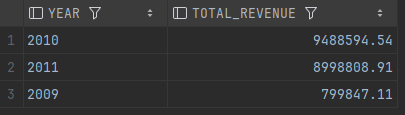

Basic Queries Findings :

*   UNIQUE Customers : 5942
*   Total Revenue Earned : $19287250.568
*   Best Year 2010



---






##**Business Analyst Perspective Insights:**

Are we growing and how many products were sold each year?

In [ ]:
%%sql

SELECT
    DISTINCT(STRFTIME('%Y', InvoiceDate)) AS YEAR,
    SUM(Price * Quantity) AS TOTAL_REVENUE,
    SUM(Quantity) AS TOTAL_QUANTITY_SOLD
FROM main.online_retaiL
GROUP BY YEAR;

UsageError: Cell magic `%%sqlSELECT` not found.


Output: 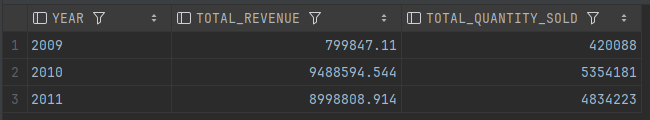

When do we make money and is it Seasonal ? (Focus on Certain Months for Maximum Earnings)

In [ ]:
%%sql

SELECT
    DISTINCT(STRFTIME('%m', InvoiceDate)) AS MONTHS,
    SUM(Price * Quantity) AS TOTAL_REVENUE,
    SUM(Quantity) AS TOTAL_QUANTITY_SOLD
FROM main.online_retaiL
GROUP BY MONTHS
ORDER BY TOTAL_REVENUE DESC;

UsageError: %%sql is a cell magic, but the cell body is empty. Did you mean the line magic %sql (single %)?


Output: 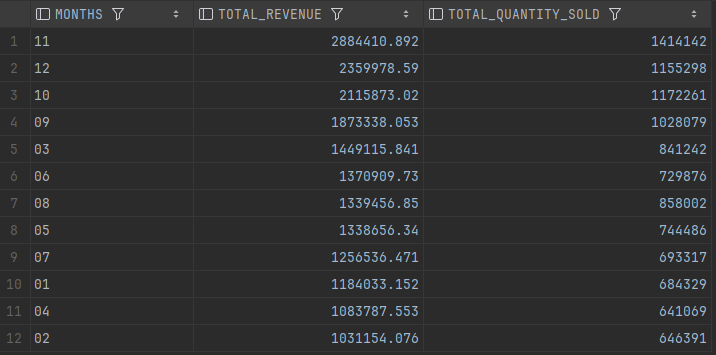

What are the top 10 products the business should prioritize to maximize revenue ?

In [ ]:
%%sql

SELECT Description,
        ROUND(SUM(Quantity * Price),2) AS TOTAL_REVENUE_OF_PRODUCT,
        SUM(Quantity) AS TOTAL_UNITS_SOLD
FROM online_retail
WHERE Description IS NOT NULL
GROUP BY Description
ORDER BY TOTAL_REVENUE_OF_PRODUCT DESC
LIMIT 10;

Output: 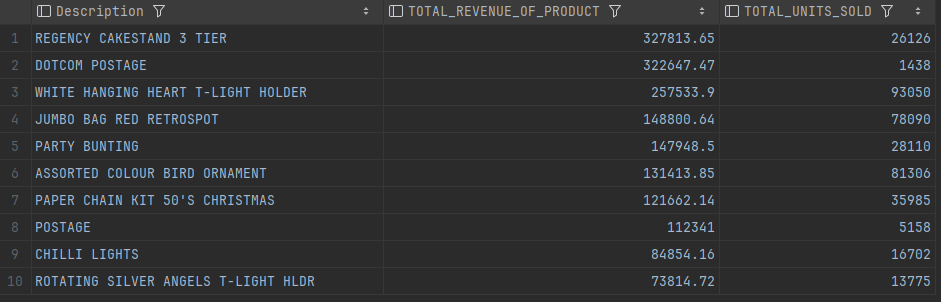

Now that we know what the top 10 Products to maxamize revenue, What is the Average Order Value (AOV) to learn our client's Buying Habits ?
 (Allows us to know how valuable each transaction is to the business)


In [ ]:
%%sql
WITH AVERAGE_ORDER AS (
        SELECT Description,
               ROUND(SUM(Price * Quantity),2) AS TOTAL_REVENUE_OF_ITEM,
                SUM(Quantity) AS TOTAL_QUANTITY_BOUGHT,
                COUNT(Description) AS TOTAL_ORDERS_COUNT_PER_PRODUCT
                FROM online_retail
                WHERE Description
                         IS NOT NULL
                GROUP BY Description
                ORDER BY TOTAL_REVENUE_OF_ITEM DESC
                LIMIT 10
        )
SELECT
    Description,
    ROUND(SUM(TOTAL_REVENUE_OF_ITEM / TOTAL_ORDERS_COUNT_PER_PRODUCT),2) AS AVERAGE_ORDER_VALUE
    FROM AVERAGE_ORDER
    GROUP BY Description
    ORDER BY AVERAGE_ORDER_VALUE DESC;

SyntaxError: invalid syntax (ipython-input-2213767682.py, line 1)

Output : 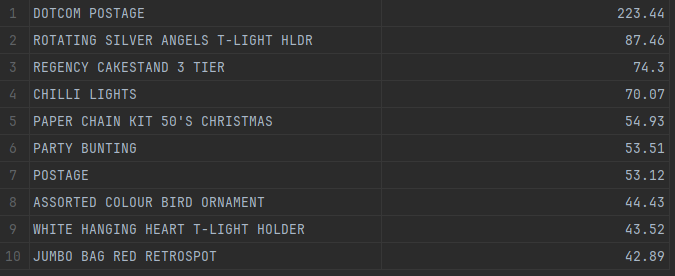

Where do our demand coming from ? (For Supply Chain Sustainability / Sourcing / Logistics )

In [ ]:
%%sql

SELECT
    Country,
     ROUND(SUM(Quantity * Price),2) AS TOTAL_REVENUE_OF_PRODUCT
    FROM online_retail
    GROUP BY Country
    ORDER BY TOTAL_REVENUE_OF_PRODUCT DESC
    LIMIT 10;



UsageError: Cell magic `%%sql` not found.


Output: 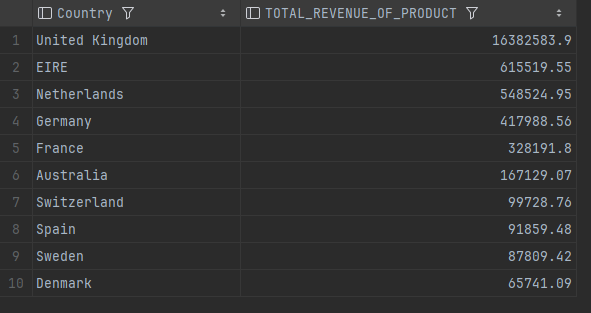

What Percentage of that Revenue is from the total?

In [ ]:
%%sql

WITH
    TOTAL_REV AS (
    SELECT SUM(Quantity * Price) AS TOTAL_REV_AMOUNT
    FROM online_retail
),

    REV_PER_COUNTRY AS (
   SELECT
    Country,
    ROUND(SUM(Quantity * Price),2) AS TOTAL_REVENUE_OF_PRODUCT
        FROM online_retail
        GROUP BY Country
        ORDER BY TOTAL_REVENUE_OF_PRODUCT DESC
)
SELECT
    Country,
    TOTAL_REVENUE_OF_PRODUCT,
    ROUND((TOTAL_REVENUE_OF_PRODUCT / TOTAL_REV_AMOUNT),4) || '%' AS PERCENTAGE -- || SQL concatenation operator
    FROM REV_PER_COUNTRY
    CROSS JOIN TOTAL_REV
    GROUP BY Country
    ORDER BY TOTAL_REVENUE_OF_PRODUCT DESC
    LIMIT 10;


Output: 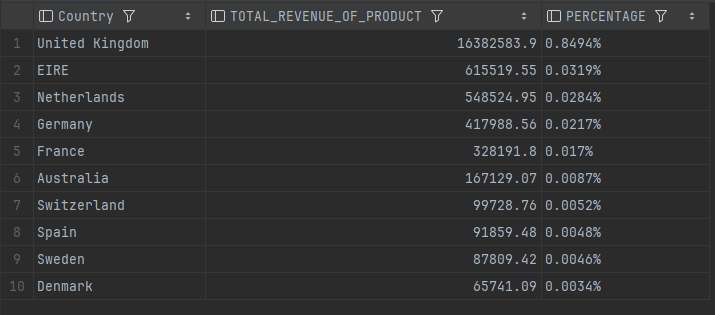



---

## **Actionable Recommendations & Metrics:**



# 1.   Seasonal & Temporal Trends


##    **Insight:**
        

*    Order volume and revenue reach their highest levels between September and December, while other periods experience noticeable declines.


##    **Recommendation:**

*    Align marketing and promotional campaigns with peak seasons to maximize revenue, and experiment with targeted incentives during slower periods to stabilize demand and encourage consistent sales throughout the year.










# 2.   Geographical & Revenue Optimization


##    **Insight:**
        

*    The United Kingdom generated the majority of total revenue, accounting for approximately 85% of overall sales, with most of the top 10 buyers based in the UK. Other countries significantly underperformed, each contributing less than a single-digit percentage to total revenue.



##    **Recommendation:**

*    Implement targeted upsell strategies across the remaining top 10 revenue generating countries to increase Average Revenue Per User (ARPU).
*  Localize pricing, promotions, and product bundles by country to better align with regional purchasing behavior and willingness to pay.






# 3.   High-Value Customer Identification


##    **Insight:**
        

*    Approximately 0.17% of customers (10 out of 5,942) generate 14% of total revenue (2,705,824 out of 19,287,250), indicating a strong concentration of high-value users.



##    **Recommendation:**

*    Develop a high-value customer program that offers exclusive perks and early access to retain and grow this segment.
* Implement proactive retention strategies (loyalty incentives) to reduce churn risk among top spenders.









# 4.   High-Value Customer Identification


##    **Insight:**
        

*   Among the Top 10 products sold, DOTCOME POSTAGE has the highest Average Order Value AOV at 223.44, significantly above the overall product average of 58.30.




##    **Recommendation:**

*    Introduce targeted upsell strategies by promoting these products to customers with historically high spending behavior.
* Potentially test bundled offerings that pair high-AOV products with complementary lower-AOV products to increase overall cart value.




